In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

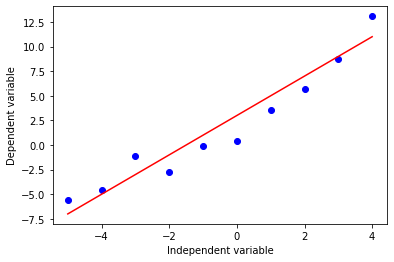

In [3]:
#linear function
x = np.arange(-5.0,5.0,1.0)
y = 2*(x)+3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

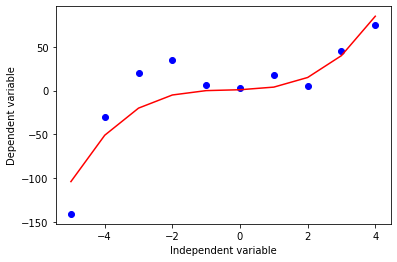

In [4]:
#cubic function graph
x = np.arange(-5.0,5.0,1.0)
y = 1*(x**3) + 1*(x**2) + 1*(x) + 1
y_noise = 20* np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

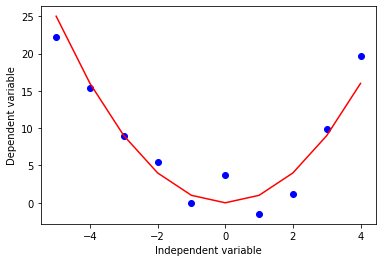

In [5]:
#Quadratic function
x = np.arange(-5.0,5.0,1.0)
y = x**2
y_noise = 2 * np.random.normal(size=x.size)
ydata = y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

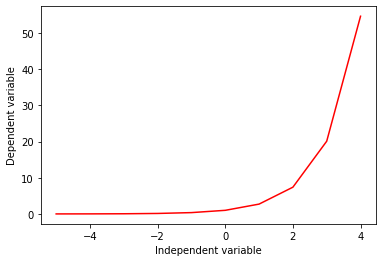

In [6]:
#Exponential function
x = np.arange(-5.0,5.0,1.0)
y = np.exp(x)

plt.plot(x,y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


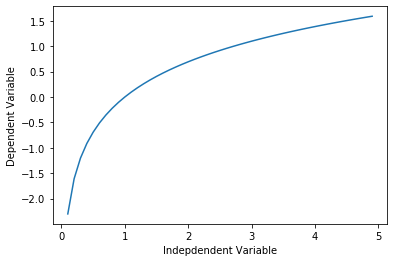

In [7]:
#logarithmic function
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

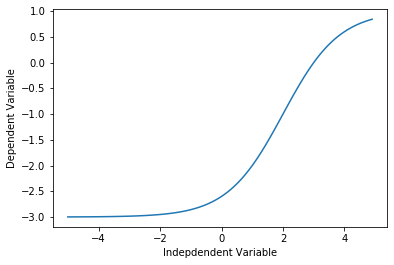

In [8]:
#Sigmoidal function
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [9]:
import numpy as np
import pandas as pd

In [10]:
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-07-22 10:52:43 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [11]:
df = pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


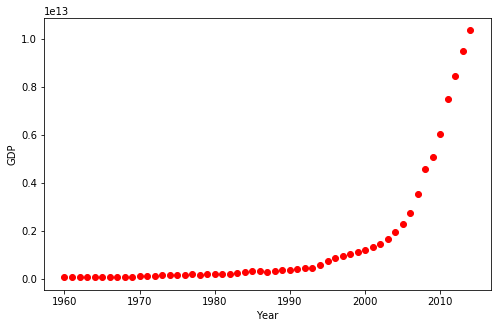

In [12]:
plt.figure(figsize=(8,5))
x_data,y_data = (df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

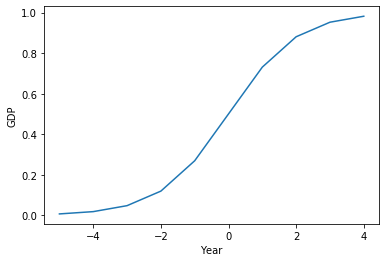

In [13]:
X = np.arange(-5.0,5.0,1.0)
Y = 1.0/(1.0 + np.exp(-X))

plt.plot(X,Y)
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [14]:
#building our model
def sigmoid(x,beta_1,beta_2):
    y = 1.0/(1.0 + np.exp(-beta_1*(x-beta_2)))
    return y

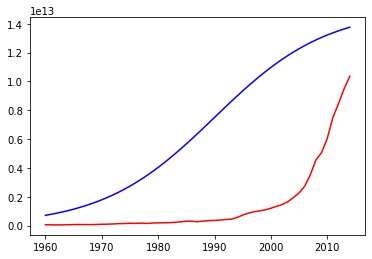

In [15]:
beta_1 = 0.10
beta_2 = 1990.0
Y_pred = sigmoid(x_data,beta_1,beta_2)

#plot initial prediction against datapoints
plt.plot(x_data,Y_pred*15000000000000.,'b')
plt.plot(x_data,y_data,'r')

In [16]:
#lets normalize our data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [19]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.447527, beta_2 = 0.997207


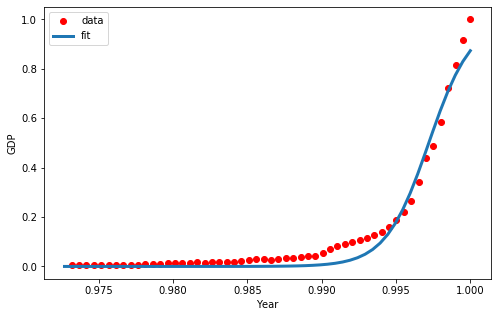

In [20]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()